<a href="https://colab.research.google.com/github/themarkfullton/newPort/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

raw_class_info = pd.read_csv("class_info.csv")
raw_class_resp = pd.read_csv("class_resp.csv")
raw_sessions = pd.read_csv("sessions.csv")
raw_students = pd.read_csv("students.csv")
raw_universities = pd.read_csv("universities.csv")

## Time Series - Tutoring Sessions

- All
- Data
- Web

In [ ]:
merged_df = raw_sessions.merge(raw_students, how="left", on="student_id")
merged_df

,student_id,session_year,session_month,session_day,session_start,primary_topic,university_id,bootcamp,is_graduate,is_student,primary_interest
0,1,2020,9,15,14,NODE_JS,1,WEB,1,0,FULL_STACK
1,2,2020,9,15,17,GIT,2,WEB,1,0,FRONT_END
2,3,2020,9,17,19,JAVASCRIPT,1,WEB,1,0,FRONT_END
3,4,2020,9,18,22,GIT,3,WEB,1,0,FULL_STACK
4,5,2020,9,18,23,SQL,4,WEB,1,0,FRONT_END
...,...,...,...,...,...,...,...,...,...,...,...
424,51,2021,7,2,16,REACT,6,WEB,0,0,FULL_STACK
425,48,2021,7,2,21,JAVASCRIPT,18,DATA,0,0,ANALYTICS
426,24,2021,7,3,10,OOP,1,WEB,0,0,FRONT_END
427,41,2021,7,3,15,PLOTLY,15,DATA,0,0,ANALYTICS


In [ ]:
merged_df.dtypes

student_id           int64
session_year         int64
session_month        int64
session_day          int64
session_start        int64
primary_topic       object
university_id        int64
bootcamp            object
is_graduate          int64
is_student           int64
primary_interest    object
dtype: object

In [ ]:
merged_df["session_date"] = [f"{row['session_year']}/{row['session_month']}/{row['session_day']}" for idx, row in merged_df.iterrows()]
merged_df["session_date"] = pd.to_datetime(merged_df["session_date"], format="%Y/%m/%d", errors="ignore")
merged_df.dtypes

student_id                   int64
session_year                 int64
session_month                int64
session_day                  int64
session_start                int64
primary_topic               object
university_id                int64
bootcamp                    object
is_graduate                  int64
is_student                   int64
primary_interest            object
session_date        datetime64[ns]
dtype: object

In [ ]:
merged_web = merged_df.loc[merged_df["bootcamp"] == "WEB"]
merged_data = merged_df.loc[merged_df["bootcamp"] == "DATA"]

Text(0, 0.5, 'Hours tutored')

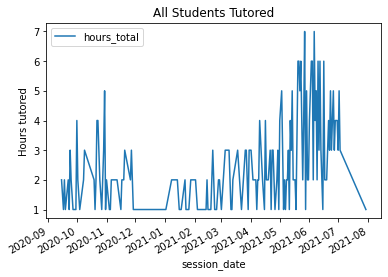

In [ ]:
time_series_all = merged_df.groupby("session_date")["student_id"].count().reset_index()
time_series_all.columns = ["session_date", "hours_total"]
time_series_all.plot(x="session_date", y="hours_total")
plt.title("All Students Tutored")
plt.ylabel("Hours tutored")

Text(0, 0.5, 'Hours tutored')

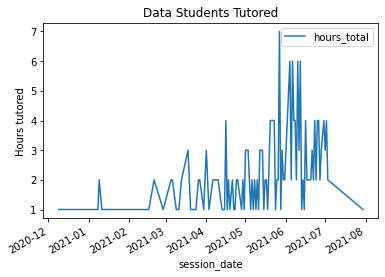

In [ ]:
time_series_data = merged_data.groupby("session_date")["student_id"].count().reset_index()
time_series_data.columns = ["session_date", "hours_total"]
time_series_data.plot(x="session_date", y="hours_total")
plt.title("Data Students Tutored")
plt.ylabel("Hours tutored")

Text(0, 0.5, 'Hours tutored')

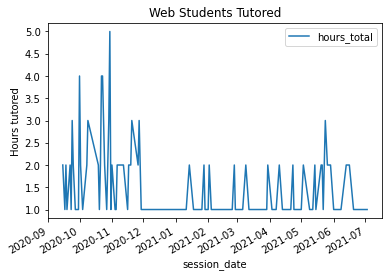

In [ ]:
time_series_web = merged_web.groupby("session_date")["student_id"].count().reset_index()
time_series_web.columns = ["session_date", "hours_total"]
time_series_web.plot(x="session_date", y="hours_total")
plt.title("Web Students Tutored")
plt.ylabel("Hours tutored")

## Students 

- Data v Web
- Graduates v Non graduates

In [ ]:
total_students = raw_students["student_id"].count()
num_data = raw_students.loc[raw_students["bootcamp"] == "DATA"]["student_id"].count()
num_web = total_students - num_data
num_graduate = raw_students["is_graduate"].sum()
num_current = total_students - num_graduate



student_bc_stats_df = pd.DataFrame({"bootcamp":["DATA", "WEB"], "number_students":[num_data, num_web]})
student_grad_stats_df = pd.DataFrame({"status":["CURRENT", "GRADUATE"], "number_students":[num_current, num_graduate]})

In [ ]:
student_stats_df

,bootcamp,number_students
0,DATA,51
1,WEB,27


In [ ]:
student_grad_stats_df

,status,number_students
0,CURRENT,35
1,GRADUATE,43


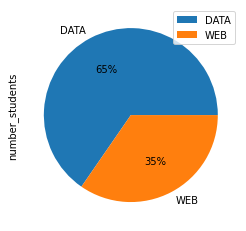

In [ ]:
student_bc_stats_df.set_index("bootcamp").plot.pie(y="number_students", autopct="%2.0f%%")

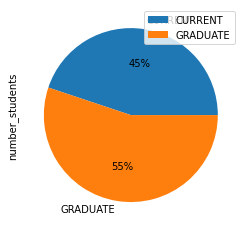

In [ ]:
student_grad_stats_df.set_index("status").plot.pie(y="number_students", autopct="%2.0f%%")

## Topics

- All
- Data Only
- Web Only

In [ ]:
all_topics = merged_df["primary_topic"].value_counts().reset_index()
data_topics = merged_data["primary_topic"].value_counts().reset_index()
web_topics = merged_web["primary_topic"].value_counts().reset_index()

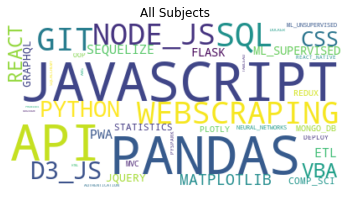

In [ ]:
text = " ".join([topic for topic in merged_df["primary_topic"]])

wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("All Subjects")
plt.axis("off")
plt.show()

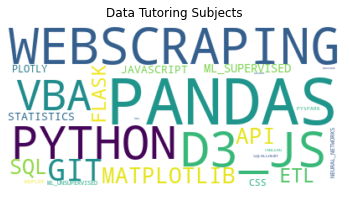

In [ ]:
text = " ".join([topic for topic in merged_data["primary_topic"]])

wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Data Tutoring Subjects")
plt.axis("off")
plt.show()

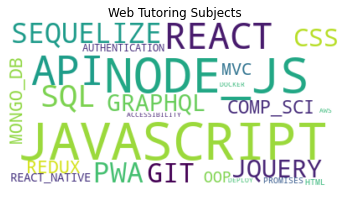

In [ ]:
text = " ".join([topic for topic in merged_web["primary_topic"]])

wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Web Tutoring Subjects")
plt.axis("off")
plt.show()

## TA Stats

- Class 1
- Class 2

In [ ]:
raw_class_info

,class_id,university_id,class_start,class_end,class_time,office_hours,total_instructors,total_tas,total_students
0,1,10,2020-12-01,2021-06-01,MON-WED,SUN,2,8,80
1,2,10,2021-06-01,2021-12-01,TUES-THURS,SAT,1,7,73


In [ ]:
raw_class_resp

,class_id,week,subject,satisfaction,academic_support,instructor_clarity,instructor_engagement,instructor_knowledge
0,1,1,excel,4.05,4.33,3.62,3.72,3.82
1,1,2,vba,4.03,4.38,3.92,4.10,4.28
2,1,3,python,4.17,4.51,4.23,4.26,4.49
3,1,4,pandas,4.15,4.38,4.35,4.41,4.59
4,1,5,matplotlib,4.64,4.70,4.61,4.52,4.58
5,1,6,apis,4.03,4.41,4.19,4.41,4.50
6,1,7,sql,4.57,4.50,4.43,4.57,4.57
7,1,8,etl,4.16,4.48,4.26,4.39,4.52
8,1,9,flask,4.34,4.45,4.38,4.38,4.55
9,1,10,webscraping,4.23,4.48,4.35,4.45,4.55


In [ ]:
class_1_resp = raw_class_resp.loc[raw_class_resp["class_id"] == 1]
class_1_resp

,class_id,week,subject,satisfaction,academic_support,instructor_clarity,instructor_engagement,instructor_knowledge
0,1,1,excel,4.05,4.33,3.62,3.72,3.82
1,1,2,vba,4.03,4.38,3.92,4.10,4.28
2,1,3,python,4.17,4.51,4.23,4.26,4.49
3,1,4,pandas,4.15,4.38,4.35,4.41,4.59
4,1,5,matplotlib,4.64,4.70,4.61,4.52,4.58
5,1,6,apis,4.03,4.41,4.19,4.41,4.50
6,1,7,sql,4.57,4.50,4.43,4.57,4.57
7,1,8,etl,4.16,4.48,4.26,4.39,4.52
8,1,9,flask,4.34,4.45,4.38,4.38,4.55
9,1,10,webscraping,4.23,4.48,4.35,4.45,4.55


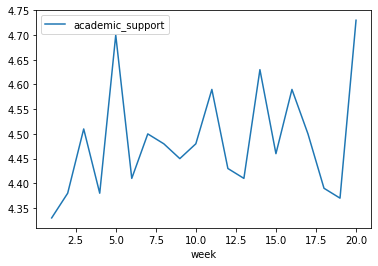

In [ ]:
class_1_resp.plot.line(x="week", y="academic_support")

## Exporting CSVs


In [ ]:
time_series_all.to_csv("./generated/sessions_all.csv", index=False)
time_series_data.to_csv("./generated/sessions_data.csv", index=False)
time_series_web.to_csv("./generated/sessions_web.csv", index=False)

student_bc_stats_df.to_csv("./generated/students_bootcamp.csv", index=False)
student_grad_stats_df.to_csv("./generated/students_graduates.csv", index=False)

all_topics.to_csv("./generated/topics_all.csv", index=False)
data_topics.to_csv("./generated/topics_data.csv", index=False)
web_topics.to_csv("./generated/topics_web.csv", index=False)

class_1_resp.to_csv("./generated/class1_stats.csv", index=False)